<a href="https://colab.research.google.com/github/j1zha/Christy.github.io/blob/main/%E2%80%9Cshorter_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

import yfinance as yf

data = yf.download("NVDA", start="2023-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


# Data Analysis of Nvidia and AMD Stock Price

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

nvda_data = yf.download("NVDA", start=start, end=end)

nvda_data.columns.name = None
nvda_data.reset_index(inplace=True)
nvda_data.rename(columns={"Date": "Date", "Open": "Open", "High": "High", "Low": "Low", "Close": "Close", "Volume": "Volume"}, inplace=True)
nvda_data.tail(10)

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
241,2025-01-17,137.710007,138.500000,135.460007,136.690002,201188800
242,2025-01-21,140.830002,141.830002,137.089996,139.160004,197749000
243,2025-01-22,147.070007,147.789993,143.669998,144.660004,237651400
244,2025-01-23,147.220001,147.229996,143.720001,145.050003,155915500
245,2025-01-24,142.619995,148.970001,141.880005,148.369995,234657600
246,2025-01-27,118.419998,128.399994,116.699997,124.800003,818830900
247,2025-01-28,128.990005,129.000000,116.250000,121.809998,579666400
248,2025-01-29,123.699997,126.889999,120.050003,126.500000,467120600
249,2025-01-30,124.650002,125.000000,118.099998,123.099998,392925500


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

amd_data = yf.download("AMD", start=start, end=end)

amd_data.columns.name = None
amd_data.reset_index(inplace=True)
amd_data.rename(columns={"Date": "Date", "Open": "Open", "High": "High", "Low": "Low", "Close": "Close", "Volume": "Volume"}, inplace=True)
amd_data.tail(10)

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AMD,AMD,AMD,AMD,AMD
241,2025-01-17,121.459999,122.739998,120.550003,120.779999,35765900
242,2025-01-21,122.279999,123.750000,121.120003,122.389999,31578800
243,2025-01-22,123.750000,125.650002,121.910004,123.080002,35023800
244,2025-01-23,123.040001,123.709999,120.629997,121.430000,24921100
245,2025-01-24,122.839996,125.250000,122.230003,124.550003,31570300
246,2025-01-27,115.010002,118.080002,112.800003,117.800003,61067900
247,2025-01-28,114.169998,116.150002,112.949997,115.180000,40554800
248,2025-01-29,117.349998,118.519997,114.959999,115.769997,40199100
249,2025-01-30,118.860001,120.440002,117.089996,118.529999,29788400


In [ ]:
nvda_data.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
count,251,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2024-07-31 17:18:24.382470144,114.347951,116.594906,111.979033,114.515205,3.638848e+08
min,2024-02-01 00:00:00,63.009136,63.173091,61.632528,62.082397,1.051570e+08
25%,2024-05-01 12:00:00,90.730530,92.200683,89.136906,90.482095,2.335026e+08
50%,2024-08-01 00:00:00,120.070000,122.420027,117.241917,120.331413,3.239520e+08
75%,2024-10-29 12:00:00,134.494995,136.655288,131.470943,134.760362,4.502710e+08
max,2025-01-31 00:00:00,149.429993,153.130005,147.820007,153.029999,1.142269e+09
std,NaN,23.019510,23.354115,22.761943,23.202622,1.642342e+08


In [ ]:
nvda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        251 non-null    datetime64[ns]
 1   (Close, NVDA)   251 non-null    float64       
 2   (High, NVDA)    251 non-null    float64       
 3   (Low, NVDA)     251 non-null    float64       
 4   (Open, NVDA)    251 non-null    float64       
 5   (Volume, NVDA)  251 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


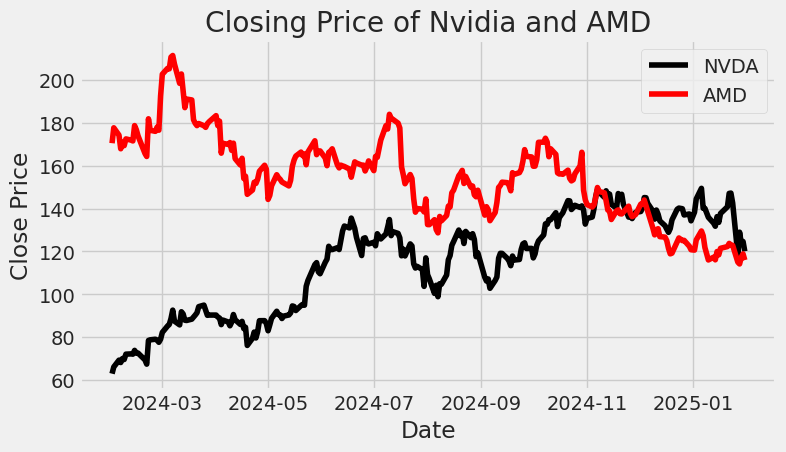

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.subplots_adjust(top=0.9, bottom=0.2)

plt.plot(nvda_data['Date'], nvda_data['Close'], label="NVDA", color="black")
plt.plot(amd_data['Date'], amd_data['Close'], label="AMD", color="red")

plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title("Closing Price of Nvidia and AMD")
plt.legend()
plt.show()


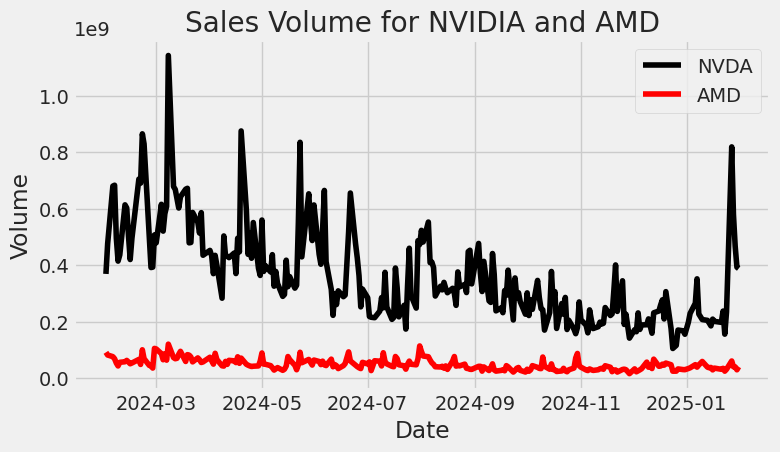

In [ ]:
plt.figure(figsize=(8, 5))
plt.subplots_adjust(top=0.9, bottom=0.2)
plt.plot(nvda_data['Date'], nvda_data['Volume'], label='NVDA', color='black')
plt.plot(amd_data['Date'], amd_data['Volume'], label='AMD', color='red')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title("Sales Volume for NVIDIA and AMD")
plt.legend()
plt.show()

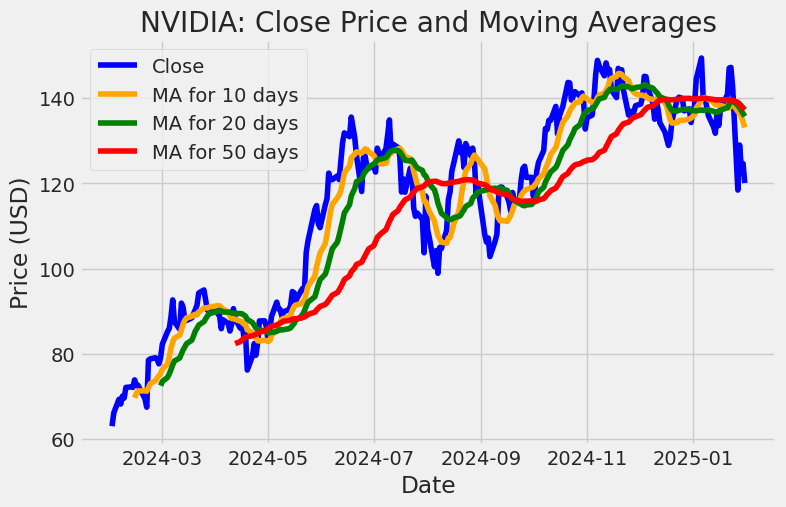

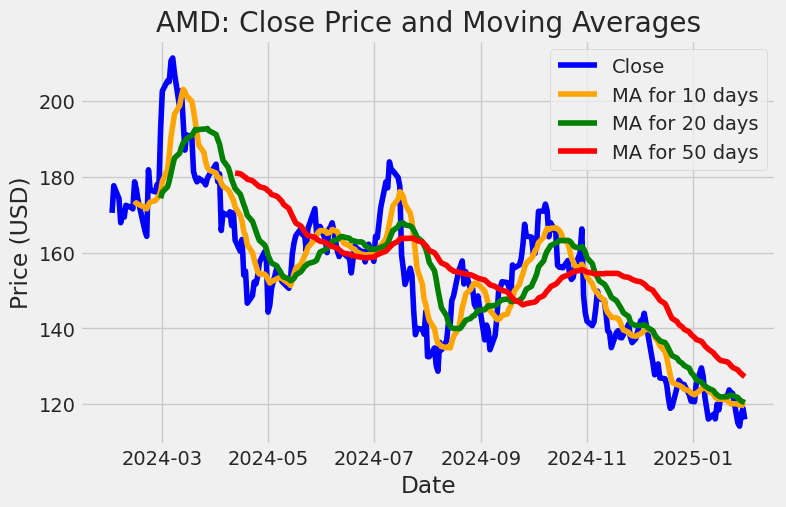

In [ ]:
ma_days = [10, 20, 50]
for ma in ma_days:
    column_name = f"MA for {ma} days"
    nvda_data[column_name] = nvda_data['Close'].rolling(ma).mean()
plt.figure(figsize=(8, 5))
plt.plot(nvda_data['Date'], nvda_data['Close'], label="Close", color="blue")
plt.plot(nvda_data['Date'], nvda_data['MA for 10 days'], label="MA for 10 days", color="orange")
plt.plot(nvda_data['Date'], nvda_data['MA for 20 days'], label="MA for 20 days", color="green")
plt.plot(nvda_data['Date'], nvda_data['MA for 50 days'], label="MA for 50 days", color="red")
plt.title("NVIDIA: Close Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(loc="best")
plt.show()

for ma in ma_days:
    amd_data[f"MA for {ma} days"] = amd_data['Close'].rolling(ma).mean()
plt.figure(figsize=(8, 5))
plt.plot(amd_data['Date'], amd_data['Close'], label="Close", color="blue")
plt.plot(amd_data['Date'], amd_data['MA for 10 days'], label="MA for 10 days", color="orange")
plt.plot(amd_data['Date'], amd_data['MA for 20 days'], label="MA for 20 days", color="green")
plt.plot(amd_data['Date'], amd_data['MA for 50 days'], label="MA for 50 days", color="red")
plt.title("AMD: Close Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(loc="best")
plt.show()


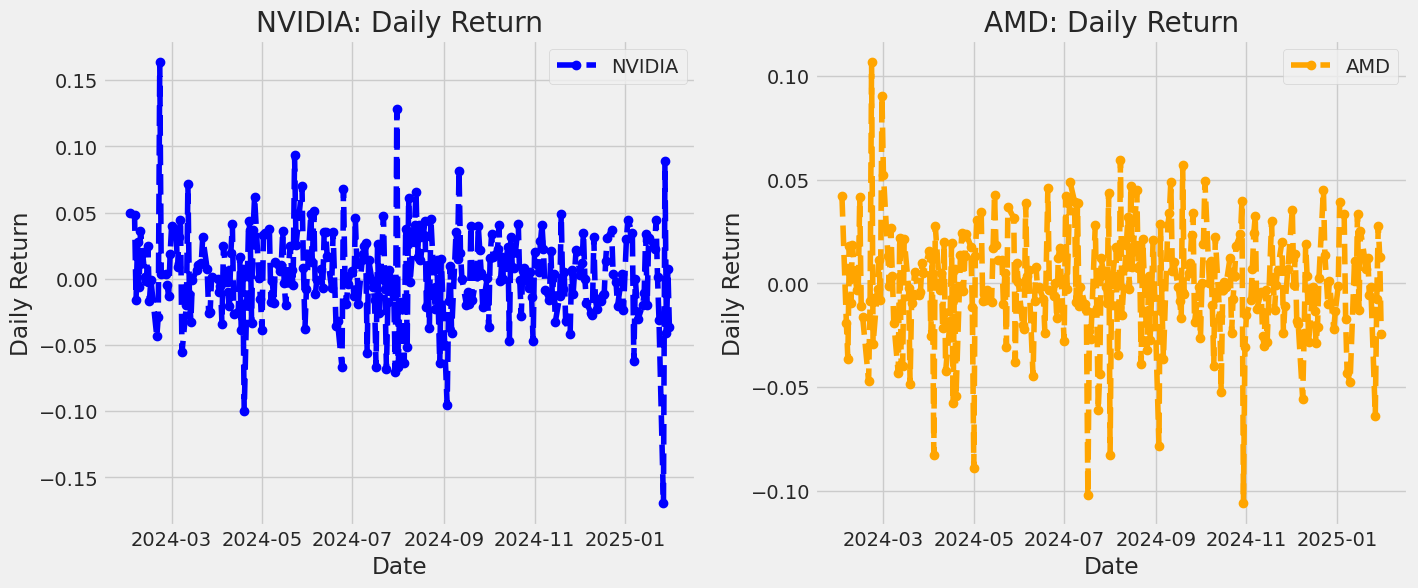

In [ ]:
import matplotlib.pyplot as plt
nvda_data['Daily Return'] = nvda_data['Close'].pct_change()
amd_data['Daily Return'] = amd_data['Close'].pct_change()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(nvda_data['Date'], nvda_data['Daily Return'], linestyle='--', marker='o', color='blue', label='NVIDIA')
axes[0].set_title('NVIDIA: Daily Return')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily Return')
axes[0].legend()

axes[1].plot(amd_data['Date'], amd_data['Daily Return'], linestyle='--', marker='o', color='orange', label='AMD')
axes[1].set_title('AMD: Daily Return')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Return')
axes[1].legend()

plt.show()


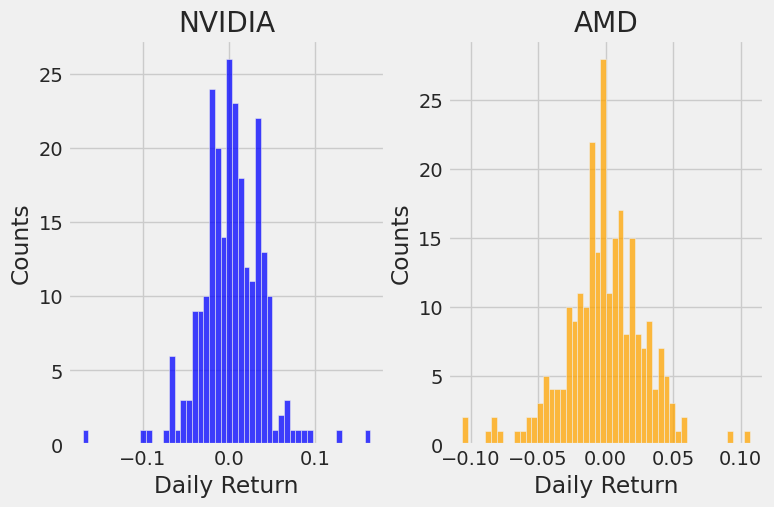

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
nvda_data['Daily Return'].hist(bins=50, color='blue', alpha=0.75)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('NVIDIA')

plt.subplot(1, 2, 2)
amd_data['Daily Return'].hist(bins=50, color='orange', alpha=0.75)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('AMD')
plt.show()


In [ ]:
tech_list = ['NVDA', 'AMD']
closing_df = yf.download(tech_list, start=start, end=end)['Close']
tech_rets = closing_df.pct_change()
tech_rets.tail()

[*********************100%***********************]  2 of 2 completed


Ticker,AMD,NVDA
Date,,
2025-01-27,-0.063741,-0.169682
2025-01-28,-0.007304,0.089259
2025-01-29,0.027853,-0.041011
2025-01-30,0.012868,0.007680
2025-01-31,-0.024483,-0.036743


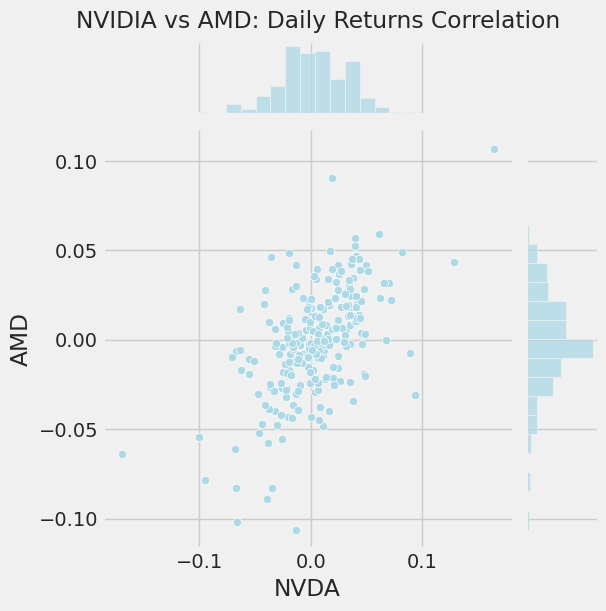

In [ ]:
import seaborn as sns
sns.jointplot(x='NVDA', y='AMD', data=tech_rets, kind='scatter', color='lightblue')

plt.suptitle('NVIDIA vs AMD: Daily Returns Correlation', y=1.02)
plt.show()


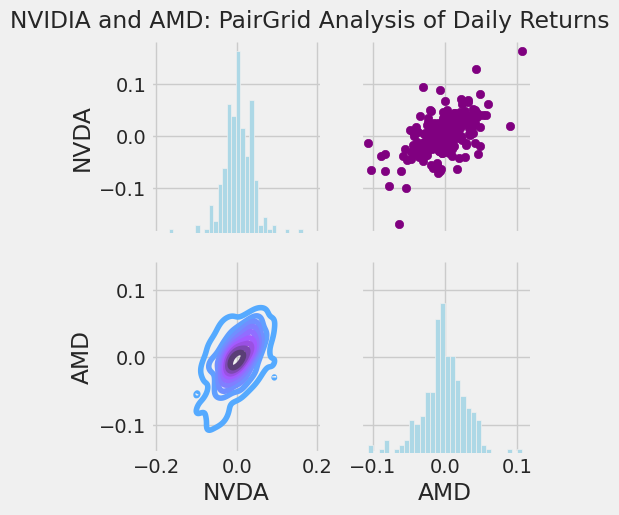

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
nvda_amd_rets = tech_rets[['NVDA', 'AMD']].dropna()
returns_fig = sns.PairGrid(nvda_amd_rets)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30, color='lightblue')

plt.suptitle('NVIDIA and AMD: PairGrid Analysis of Daily Returns', y=1.02)

plt.show()


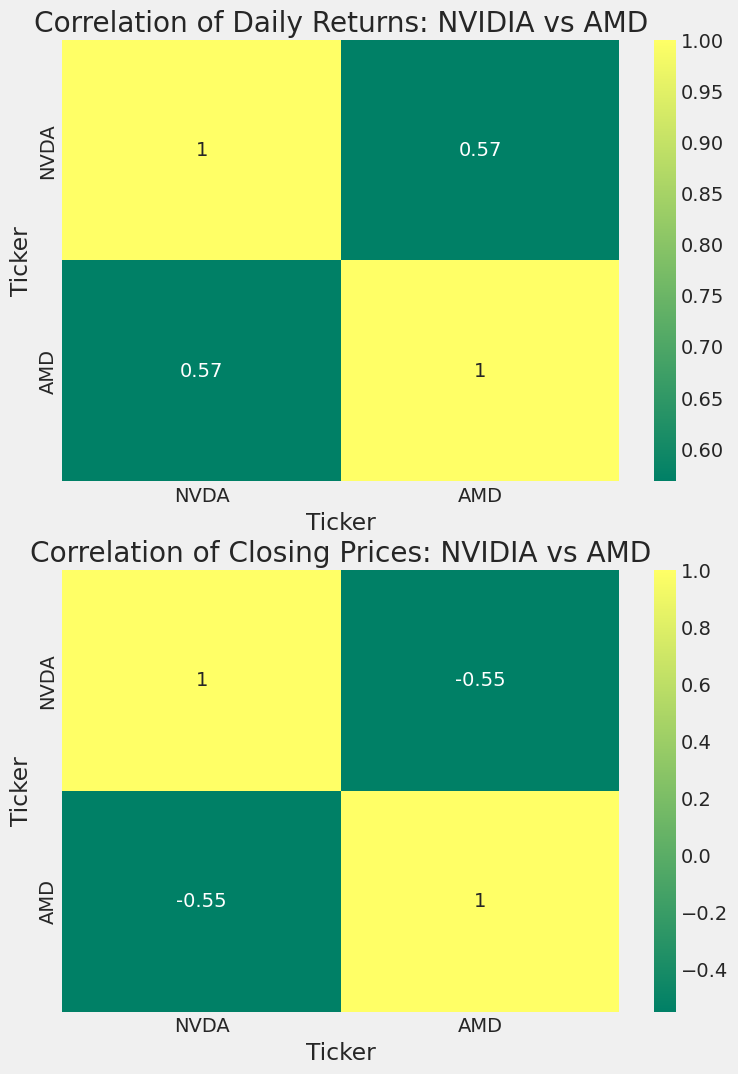

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.heatmap(tech_rets[['NVDA', 'AMD']].corr(), annot=True, cmap='summer', cbar=True)
plt.title('Correlation of Daily Returns: NVIDIA vs AMD')

plt.subplot(2, 1, 2)
sns.heatmap(closing_df[['NVDA', 'AMD']].corr(), annot=True, cmap='summer', cbar=True)
plt.title('Correlation of Closing Prices: NVIDIA vs AMD')
plt.show()


In [ ]:
nvda_data

Price,Date,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
0,2024-02-01,63.009136,63.173091,61.632528,62.082397,369146000,NaN,NaN,NaN,NaN
1,2024-02-02,66.141251,66.581121,63.671946,63.955866,476578000,NaN,NaN,NaN,0.049709
2,2024-02-05,69.312355,69.477309,67.185959,68.205666,680078000,NaN,NaN,NaN,0.047944
3,2024-02-06,68.203667,69.734231,66.281215,69.610266,683111000,NaN,NaN,NaN,-0.015996
4,2024-02-07,70.079124,70.200092,67.580832,68.299630,495575000,NaN,NaN,NaN,0.027498
...,...,...,...,...,...,...,...,...,...,...
246,2025-01-27,118.419998,128.399994,116.699997,124.800003,818830900,136.867001,138.288000,138.999663,-0.169682
247,2025-01-28,128.990005,129.000000,116.250000,121.809998,579666400,136.443002,137.741000,138.613868,0.089259
248,2025-01-29,123.699997,126.889999,120.050003,126.500000,467120600,135.637003,137.075500,138.162670,-0.041011


# Nvidia LSTM Stock Price Prediction

In [ ]:
import yfinance as yf
from datetime import datetime

start_new = '2012-01-01'
end_date = datetime.now()

nvda_new = yf.download('NVDA', start=start_new, end=end_date)
nvda_new.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-01-27,118.419998,128.399994,116.699997,124.800003,818830900
2025-01-28,128.990005,129.000000,116.250000,121.809998,579666400
2025-01-29,123.699997,126.889999,120.050003,126.500000,467120600
2025-01-30,124.650002,125.000000,118.099998,123.099998,392925500
2025-01-31,120.070000,127.849998,119.190002,123.779999,388161100


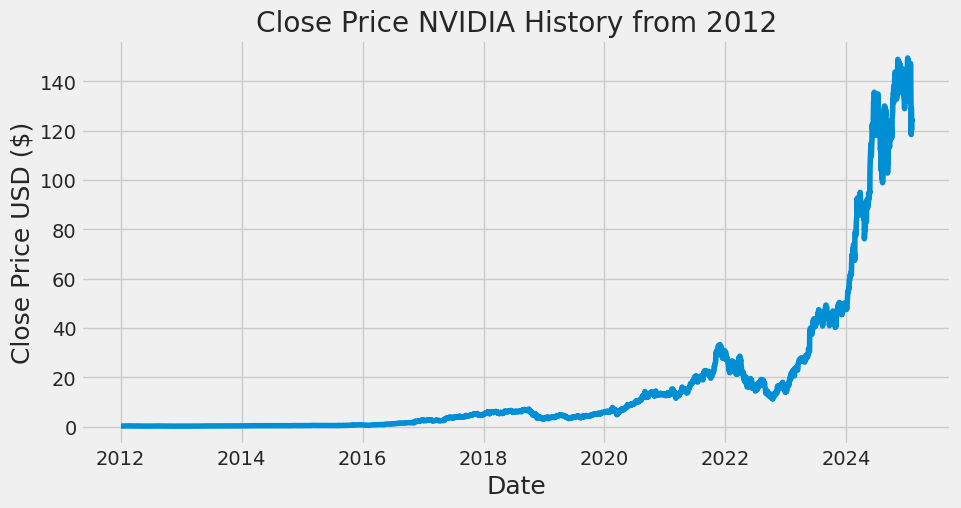

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Close Price NVIDIA History from 2012')
plt.plot(nvda_new['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
print(nvda_new.columns)

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])


In [ ]:

data = nvda_new.filter([( 'Close', 'NVDA')])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[4.08839553e-04],
       [4.33430766e-04],
       [5.11817930e-04],
       ...,
       [8.27511201e-01],
       [8.33879844e-01],
       [8.03176418e-01]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
context_length = 128
for i in range(context_length, len(train_data)):
    x_train.append(train_data[i-context_length:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2998/2998 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - loss: 0.0012


In [ ]:
test_data = scaled_data[training_data_len - context_length: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(context_length, len(test_data)):
    x_test.append(test_data[i-context_length:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


7.69845504520993

In [ ]:
y_test.min(), y_test.max()

(98.89472961425781, 149.42999267578125)

In [ ]:
nrmse = rmse / np.mean(y_test)
print(f"Normalized RMSE: {nrmse:.4f}")


Normalized RMSE: 0.0598


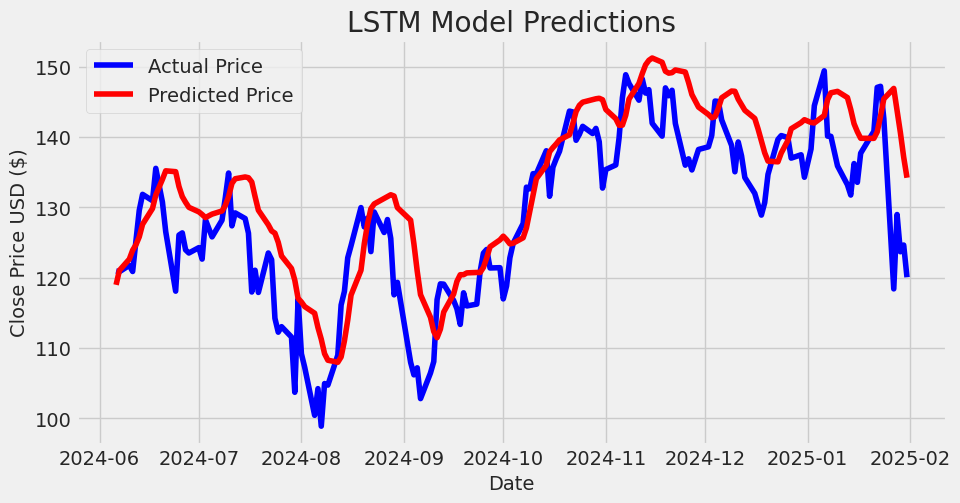

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

valid = data[training_data_len:].copy()
valid['Predictions'] = predictions
plt.figure(figsize=(10,5))
plt.title('LSTM Model Predictions')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)

plt.plot(valid['Close'], label="Actual Price", color='blue')
plt.plot(valid['Predictions'], label="Predicted Price", color='red')

plt.legend(loc='upper left')
plt.show()


In [ ]:
valid

,Close,Predictions
,NVDA,
Date,,
2024-06-06,120.969376,119.641853
2024-06-07,120.859406,121.874878
2024-06-10,121.761192,123.594620
2024-06-11,120.891335,124.977112
2024-06-12,125.180656,125.805435
...,...,...
2025-01-27,118.419998,150.872147
2025-01-28,128.990005,146.972122


In [ ]:
!pip install properscoring


In [ ]:
from scipy.stats import norm
import numpy as np

y_test = np.array(y_test).flatten()
predictions = np.array(predictions).flatten()

sigma = np.std(y_test - predictions)

crps_values = []
for i in range(len(y_test)):
    mu = predictions[i]
    y = y_test[i]
    cdf = norm.cdf(y, loc=mu, scale=sigma)
    pdf = norm.pdf(y, loc=mu, scale=sigma)

    crps = sigma / np.sqrt(np.pi) - (y - mu) / sigma * (2 * cdf - 1) + 2 / np.sqrt(np.pi) * np.exp(-((y - mu) ** 2) / (sigma ** 2))
    crps_values.append(crps)

crps_score = np.mean(crps_values)
print(f"CRPS Score: {crps_score:.4f}")

CRPS Score: 3.4138


In [ ]:
mae = np.mean(np.abs(y_test - predictions))
mae

6.139577214310809

In [ ]:
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mape

4.9524388393200764

# Lag-llama (Zero Shot Forecasting) Stock Price Prediction

In [ ]:
!git clone -b update-gluonts https://github.com/time-series-foundation-models/lag-llama/

fatal: destination path 'lag-llama' already exists and is not an empty directory.


In [ ]:
cd /content/lag-llama

/content/lag-llama


In [ ]:
!pip install -U -r requirements.txt

  Using cached numpy-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached triton-3.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl (766.7 MB)
Using cached triton-3.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (253.2 MB)
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.5.0
    Uninstalling torch-2.5.0:
      Successfully uninstalled torch-2.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.20.1+cu124 requires torch==2.5.1, but you have torch 2.6.0 

In [ ]:
!pip install torch==2.5.0 --force-reinstall


  Using cached torch-2.5.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Usi

In [ ]:
cd /content/lag-llama/

/content/lag-llama


In [ ]:
!huggingface-cli download time-series-foundation-models/Lag-Llama lag-llama.ckpt --local-dir /content/lag-llama

/content/lag-llama/lag-llama.ckpt


In [ ]:
from itertools import islice

from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import torch
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset

from gluonts.dataset.pandas import PandasDataset
import pandas as pd

from lag_llama.gluon.estimator import LagLlamaEstimator

In [ ]:
import sys
from types import ModuleType

# Create dummy module hierarchy
def create_dummy_module(module_path):
    """
    Create a dummy module hierarchy for the given path.
    Returns the leaf module.
    """
    parts = module_path.split('.')
    current = ''
    parent = None

    for part in parts:
        current = current + '.' + part if current else part
        if current not in sys.modules:
            module = ModuleType(current)
            sys.modules[current] = module
            if parent:
                setattr(sys.modules[parent], part, module)
        parent = current

    return sys.modules[module_path]

# Create the dummy gluonts module hierarchy
gluonts_module = create_dummy_module('gluonts.torch.modules.loss')

# Create dummy classes for the specific loss functions
class DistributionLoss:
    def __init__(self, *args, **kwargs):
        pass

    def __call__(self, *args, **kwargs):
        return 0.0

    def __getattr__(self, name):
        return lambda *args, **kwargs: None

class NegativeLogLikelihood:
    def __init__(self, *args, **kwargs):
        pass

    def __call__(self, *args, **kwargs):
        return 0.0

    def __getattr__(self, name):
        return lambda *args, **kwargs: None

# Add the specific classes to the module
gluonts_module.DistributionLoss = DistributionLoss
gluonts_module.NegativeLogLikelihood = NegativeLogLikelihood

In [ ]:
def get_lag_llama_predictions(dataset, prediction_length, device, context_length=32, use_rope_scaling=False, num_samples=100):
    ckpt = torch.load("lag-llama.ckpt", map_location=device) # Uses GPU since in this Colab we use a GPU.
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

    rope_scaling_arguments = {
        "type": "linear",
        "factor": max(1.0, (context_length + prediction_length) / estimator_args["context_length"]),
    }

    estimator = LagLlamaEstimator(
        ckpt_path="lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length, # Lag-Llama was trained with a context length of 32, but can work with any context length

        # estimator args
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],
        rope_scaling=rope_scaling_arguments if use_rope_scaling else None,

        batch_size=1,
        num_parallel_samples=100,
        device=device,
    )

    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=num_samples
    )
    forecasts = list(forecast_it)
    tss = list(ts_it)

    return forecasts, tss

## Loading datasets of different types

In [ ]:
nvda_new

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2012-01-03,0.321897,0.330151,0.321209,0.327858,468044000
2012-01-04,0.325565,0.326941,0.319146,0.322126,347372000
2012-01-05,0.337258,0.338863,0.322585,0.323960,563548000
2012-01-06,0.333361,0.337258,0.329463,0.337029,533252000
2012-01-09,0.333361,0.339780,0.331068,0.333590,508244000
...,...,...,...,...,...
2025-01-27,118.419998,128.399994,116.699997,124.800003,818830900
2025-01-28,128.990005,129.000000,116.250000,121.809998,579666400


In [ ]:
df = nvda_new[('Close', 'NVDA')].reset_index()
df.columns = ['Date', 'target']
df.set_index('Date')

,target
Date,
2012-01-03,0.321897
2012-01-04,0.325565
2012-01-05,0.337258
2012-01-06,0.333361
2012-01-09,0.333361
...,...
2025-01-27,118.419998
2025-01-28,128.990005
2025-01-29,123.699997


In [ ]:
backtest_dataset = dataset
prediction_length = 7  # Define your prediction length. We use 24 here since the data is of hourly frequency
num_samples = 100 # number of samples sampled from the probability distribution for each timeste

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
forecasts, tss = get_lag_llama_predictions(
    backtest_dataset,
    prediction_length,
    device,  # 现在 device 已经定义
    num_samples
)


In [ ]:
len(forecasts)

1

In [ ]:
forecasts[0].samples.shape

(100, 30)

In [ ]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%Y-%m-%d')
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), len(forecasts)):
    ax = plt.subplot(3, 3, idx + 1)

    context_length = 32
    plt.plot(ts[-context_length:].to_timestamp(), label="target")

    forecast.plot(color='g')

    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)

    title = forecast.item_id if forecast.item_id is not None else "Single Series"
    ax.set_title(title)
    ax.legend(["target", "prediction"])

plt.gcf().tight_layout()
plt.show()

### Zero-Shot Forecasting: Tuning the context length

In [ ]:
forecasts, tss = get_lag_llama_predictions(
    backtest_dataset,
    device = torch.device("cuda"),
    prediction_length=7,
    context_length=32,
    use_rope_scaling=False,
    num_samples=100
)

forecasts = list(forecasts)
tss = list(tss)

evaluator = Evaluator()

agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))
print("CRPS:", agg_metrics['mean_wQuantileLoss'])


<ipython-input-8-4cfbdecae087>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("lag-llama.ckpt", map_location=device) # Uses GPU since in this Colab we us

CRPS: 0.03700768061839435


In [ ]:
forecasts, tss = get_lag_llama_predictions(
    backtest_dataset,
    device=torch.device("cuda"),
    prediction_length=7,
    context_length=64,
    use_rope_scaling=False,
    num_samples=100
)

forecasts = list(forecasts)
tss = list(tss)

evaluator = Evaluator()
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))

print("CRPS:", agg_metrics['mean_wQuantileLoss'])


<ipython-input-8-4cfbdecae087>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("lag-llama.ckpt", map_location=device) # Uses GPU since in this Colab we us

CRPS: 0.03633803113021064


In [ ]:
forecasts, tss = get_lag_llama_predictions(
    backtest_dataset,
    device=torch.device("cuda"),
    prediction_length=7,
    context_length=128,
    use_rope_scaling=False,
    num_samples=100
)

forecasts = list(forecasts)
tss = list(tss)

evaluator = Evaluator()
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))

print("CRPS:", agg_metrics['mean_wQuantileLoss'])

<ipython-input-8-4cfbdecae087>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("lag-llama.ckpt", map_location=device) # Uses GPU since in this Colab we us

CRPS: 0.054495536802484895


In [ ]:
forecasts, tss = get_lag_llama_predictions(
    backtest_dataset,
    device=torch.device("cuda"),
    prediction_length=7,
    context_length=256,
    use_rope_scaling=False,
    num_samples=100
)

forecasts = list(forecasts)
tss = list(tss)

evaluator = Evaluator()
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))

print("CRPS:", agg_metrics['mean_wQuantileLoss'])

<ipython-input-8-4cfbdecae087>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("lag-llama.ckpt", map_location=device) # Uses GPU since in this Colab we us

CRPS: 0.045898552044588786


# Lag Llama Fine Tuning

In [ ]:
!git clone -b update-gluonts https://github.com/time-series-foundation-models/lag-llama/

fatal: destination path 'lag-llama' already exists and is not an empty directory.


In [ ]:
cd /content/lag-llama

/content/lag-llama


In [ ]:
!pip uninstall jax jaxlib tensorboard -y

In [ ]:
!pip install -U -r requirements.txt --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.20.1+cu124 requires torch==2.5.1, but you have torch 2.6.0 which is incompatible.
torchaudio 2.5.1+cu124 requires torch==2.5.1, but you have torch 2.6.0 which is incompatible.
fastai 2.7.18 requires torch<2.6,>=1.10, but you have torch 2.6.0 which is incompatible.


In [ ]:
!pip install torch==2.5.1

  Using cached triton-3.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.5 MB/s eta 0:00:00
Using cached triton-3.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (209.5 MB)
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0
    Uninstalling torch-2.6.0:
      Successfully uninstalled torch-2.6.0


In [ ]:
!huggingface-cli download time-series-foundation-models/Lag-Llama lag-llama.ckpt --local-dir /content/lag-llama

/content/lag-llama/lag-llama.ckpt


In [ ]:
from itertools import islice

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from tqdm.autonotebook import tqdm

import torch
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset

from gluonts.dataset.pandas import PandasDataset
import pandas as pd

from lag_llama.gluon.estimator import LagLlamaEstimator

In [ ]:
import sys
from types import ModuleType

# Create dummy module hierarchy
def create_dummy_module(module_path):
    """
    Create a dummy module hierarchy for the given path.
    Returns the leaf module.
    """
    parts = module_path.split('.')
    current = ''
    parent = None

    for part in parts:
        current = current + '.' + part if current else part
        if current not in sys.modules:
            module = ModuleType(current)
            sys.modules[current] = module
            if parent:
                setattr(sys.modules[parent], part, module)
        parent = current

    return sys.modules[module_path]

# Create the dummy gluonts module hierarchy
gluonts_module = create_dummy_module('gluonts.torch.modules.loss')

# Create dummy classes for the specific loss functions
class DistributionLoss:
    def __init__(self, *args, **kwargs):
        pass

    def __call__(self, *args, **kwargs):
        return 0.0

    def __getattr__(self, name):
        return lambda *args, **kwargs: None

class NegativeLogLikelihood:
    def __init__(self, *args, **kwargs):
        pass

    def __call__(self, *args, **kwargs):
        return 0.0

    def __getattr__(self, name):
        return lambda *args, **kwargs: None

# Add the specific classes to the module
gluonts_module.DistributionLoss = DistributionLoss
gluonts_module.NegativeLogLikelihood = NegativeLogLikelihood

In [ ]:
def get_lag_llama_predictions(dataset, prediction_length, context_length=32, num_samples=20, device="cuda", batch_size=64, nonnegative_pred_samples=True):
    ckpt = torch.load("lag-llama.ckpt", map_location=device)
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

    estimator = LagLlamaEstimator(
        ckpt_path="lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length,

        # estimator args
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],

        nonnegative_pred_samples=nonnegative_pred_samples,

        # linear positional encoding scaling
        rope_scaling={
            "type": "linear",
            "factor": max(1.0, (context_length + prediction_length) / estimator_args["context_length"]),
        },

        batch_size=batch_size,
        num_parallel_samples=num_samples,
    )

    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=num_samples
    )
    forecasts = list(tqdm(forecast_it, total=len(dataset), desc="Forecasting batches"))
    tss = list(tqdm(ts_it, total=len(dataset), desc="Ground truth"))

    return forecasts, tss

# Zero Shot on Nvidia

In [ ]:
import yfinance as yf
from datetime import datetime

start_new = '2012-01-01'
end_date = datetime.now()

nvda_new = yf.download('NVDA', start=start_new, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data = nvda_new.filter([( 'Close', 'NVDA')])
dataset = data.values

In [ ]:
prediction_length = 7
context_length = 32
num_samples = 100
device = "cuda"

In [ ]:
forecasts, tss = get_lag_llama_predictions(
    dataset,
    device=torch.device("cuda"),
    prediction_length=prediction_length,
    context_length=context_length,
    num_samples=num_samples
)

# forecasts = list(forecasts)
# tss = list(tss)

# evaluator = Evaluator()
# agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))

# print("CRPS:", agg_metrics['mean_wQuantileLoss'])

<ipython-input-12-3f8a67d29b95>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("lag-llama.ckpt", map_location=device)


Forecasting batches:   0%|          | 0/3290 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
forecasts, tss = get_lag_llama_predictions(
    dataset['test'],
    prediction_length=prediction_length,
    num_samples=num_samples,
    context_length=context_length,
    device=device
)


<ipython-input-12-3f8a67d29b95>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("lag-llama.ckpt", map_location=device)


Forecasting batches:   0%|          | 0/1 [00:00<?, ?it/s]

AssertionError: 